# Principal Component Analysis

In [98]:
import numpy             as np
import matplotlib.pyplot as plt

from itertools                          import cycle
from sklearn.datasets.samples_generator import make_blobs, make_moons

%matplotlib inline

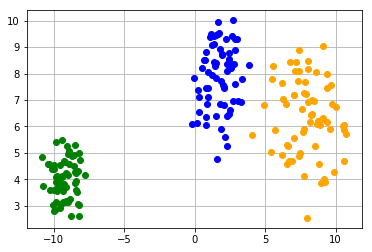

In [161]:
#centers = [[1, 1], [-1, -1], [1, -1]]
#X, L    = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
#                            random_state=0)

N    = 200
X, L = make_blobs(n_samples=N, cluster_std=[1.0, 1.5, 0.75],
                             random_state=20)

plt.figure()
plt.plot( X[L==0,0],X[L==0,1],'o',color='blue' )
plt.plot( X[L==1,0],X[L==1,1],'o',color='orange' )
plt.plot( X[L==2,0],X[L==2,1],'o',color='green' )
plt.grid(True)

In [162]:
from sklearn.decomposition import PCA

model = PCA( n_components=2,svd_solver='full')

model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [163]:
model.explained_variance_ratio_

array([0.95431772, 0.04568228])

In [164]:
XPCA = model.transform(X)
XPCA.shape

(200, 2)

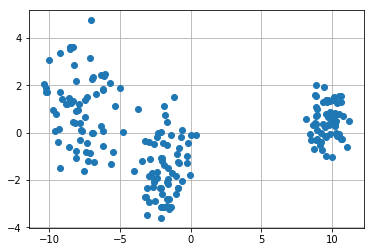

In [165]:
plt.figure()
plt.plot( XPCA[:,0],XPCA[:,1],'o' )
plt.grid(True)
plt.show()

In [166]:
from sklearn.cluster import KMeans as kmeans

In [168]:
clustering = kmeans(n_clusters=3)

clustering.fit(XPCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [156]:
LPCA = clustering.predict(XPCA)

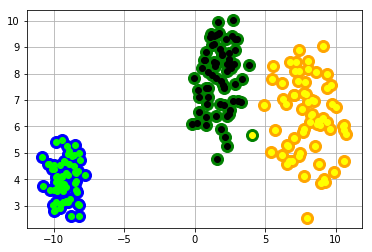

In [169]:
plt.figure()
plt.plot( X[LPCA==0,0],X[LPCA==0,1],'o',color='blue'  ,markersize=12 )
plt.plot( X[LPCA==1,0],X[LPCA==1,1],'o',color='orange',markersize=12 )
plt.plot( X[LPCA==2,0],X[LPCA==2,1],'o',color='green' ,markersize=12 )

plt.plot( X[L==0,0],X[L==0,1],'o',color='black' )
plt.plot( X[L==1,0],X[L==1,1],'o',color='yellow' )
plt.plot( X[L==2,0],X[L==2,1],'o',color='lime' )
plt.grid(True)

In [159]:
clustering = kmeans(n_clusters=3)

clustering.fit(X)
LN = clustering.predict(X)

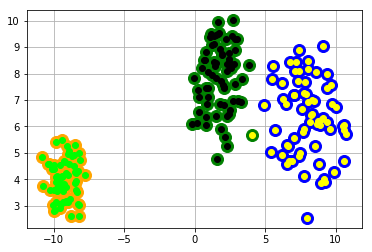

In [160]:
plt.figure()
plt.plot( X[LN==0,0],X[LN==0,1],'o',color='blue'  ,markersize=12 )
plt.plot( X[LN==1,0],X[LN==1,1],'o',color='orange',markersize=12 )
plt.plot( X[LN==2,0],X[LN==2,1],'o',color='green' ,markersize=12 )

plt.plot( X[L==0,0],X[L==0,1],'o',color='black' )
plt.plot( X[L==1,0],X[L==1,1],'o',color='yellow' )
plt.plot( X[L==2,0],X[L==2,1],'o',color='lime' )
plt.grid(True)

In [77]:
from sklearn.cluster import SpectralClustering as spectral

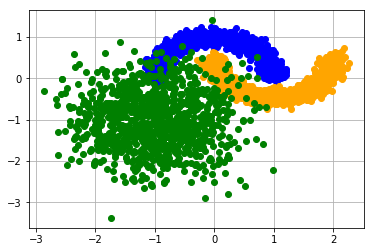

In [119]:
X, L = make_moons(n_samples=2000, noise=.1)

centers = [[1, 1], [-1, -1], [-1, -1]]
Y, M    = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7,
                            random_state=0)

plt.figure()
plt.plot( X[L==0,0],X[L==0,1],'o',color='blue' )
plt.plot( X[L==1,0],X[L==1,1],'o',color='orange' )
plt.plot( Y[M==2,0],Y[M==1,1],'o',color='green' )
plt.grid(True)

In [120]:
XX = np.concatenate( [ X,Y[M==2] ] )
LL = np.concatenate( [ L,M[M==2] ] )

In [125]:
clustering = kmeans(n_clusters=3)
clustering.fit(XX)
L_km  = clustering.fit_predict(XX)

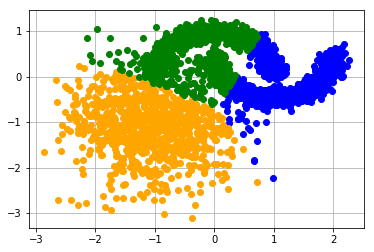

In [126]:
plt.figure()
plt.plot( XX[L_km==0,0], XX[L_km==0,1],'o',color='blue')
plt.plot( XX[L_km==1,0], XX[L_km==1,1],'o',color='orange')
plt.plot( XX[L_km==2,0], XX[L_km==2,1],'o',color='green')
plt.grid(True)
plt.show()

In [133]:
model = PCA( n_components=1,svd_solver='full')
model.fit(XX)

XPCA  = model.transform(XX)

clustering = kmeans(n_clusters=3)
clustering.fit(XPCA)
L_km  = clustering.fit_predict(XPCA)

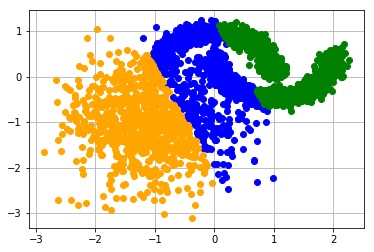

In [134]:
plt.figure()
plt.plot( XX[L_km==0,0], XX[L_km==0,1],'o',color='blue')
plt.plot( XX[L_km==1,0], XX[L_km==1,1],'o',color='orange')
plt.plot( XX[L_km==2,0], XX[L_km==2,1],'o',color='green')
plt.grid(True)
plt.show()

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

In [3]:
sr = 120.
L  = 10
t  = np.linspace (0,L, int(sr*L) )

In [36]:
X = []
X.append( np.sin(2*np.pi*t) )
X.append( np.random.randn(t.shape[0]) )

X = np.array(X)
X.shape

(2, 1200)

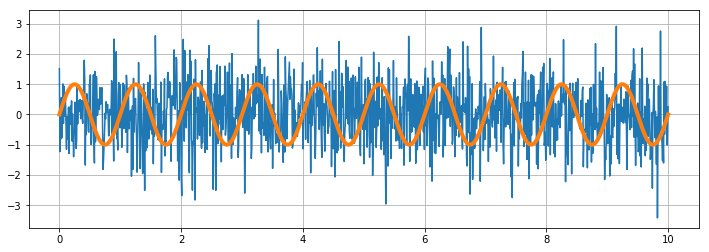

In [37]:
plt.figure(figsize=(12,4))
plt.plot(t,X[1])
plt.plot(t,X[0],linewidth=4)
plt.grid(True)

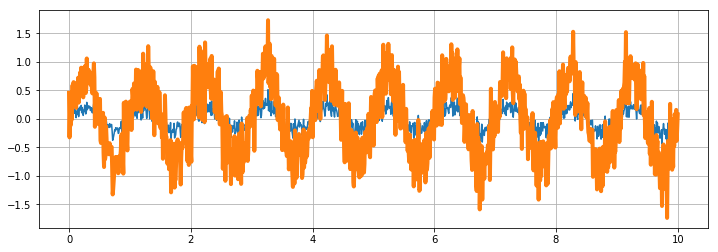

In [77]:
A = np.array( [[.8,.3],[.2,.1]] )

X_mx = np.dot(A,X)

plt.figure(figsize=(12,4))
plt.plot(t,X_mx[1])
plt.plot(t,X_mx[0],linewidth=4)
plt.grid(True)

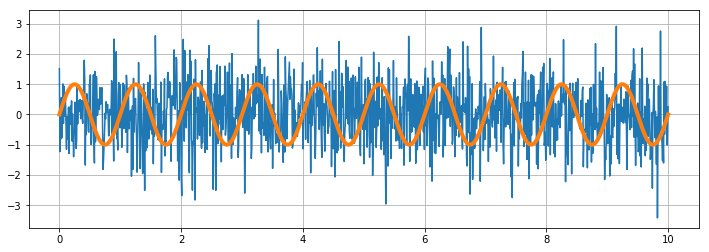

In [78]:
A_   = np.linalg.inv(A)
X_rx = np.dot(A_,X_mx)

plt.figure(figsize=(12,4))
plt.plot(t,X_rx[1])
plt.plot(t,X_rx[0],linewidth=4)
plt.grid(True)

In [79]:
from sklearn.decomposition import PCA

model = PCA( n_components=2,svd_solver='full')

model.fit(X_mx)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

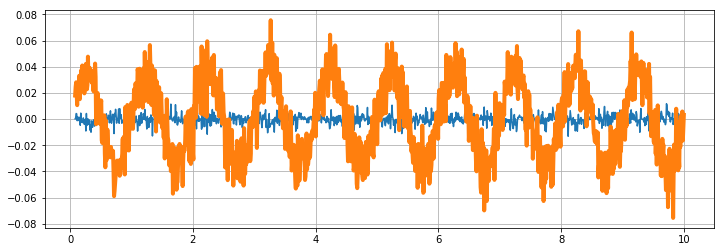

In [80]:
model.transform(X_mx)

X_PCA = model.components_

plt.figure(figsize=(12,4))
plt.plot(t[10:],X_PCA[1,10:])
plt.plot(t[10:],X_PCA[0,10:],linewidth=4)
plt.grid(True)

In [33]:
data = np.load('/home/omarpr/Dropbox/Brain/UAM/Cursos/data/wav/ecg_noise_01.npz')

for i in data.keys():
    print (i)

ecg
sr


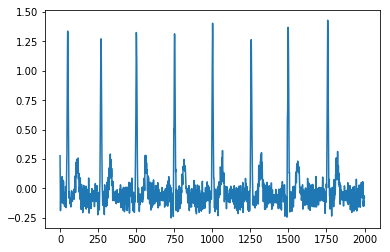

In [35]:
plt.plot(data['ecg'][:2000])